# The Suicide Rates Relationship with Global Crises - 510 Final Project

### By Adnaan Hasan, Shailey Gulrajani, and Tom Greene

### Introduction 

We decided to focus on the suicide rate and how it is affected by different global crisis.

### Setup/ Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df1 = pd.read_csv(r"C:\Users\green\Downloads\Data Analysis\Final Project Files\20160923_global_crisis_data.csv")
df2 = pd.read_csv(r"C:\Users\green\Downloads\Data Analysis\Final Project Files\master.csv")

### Data Cleaning/ Combining

The year and country in the dataset regarding suicide rate was seperated by sex and age range. We decided to accurately combine the data sets to make the country year consistent in both.

In [2]:
df1 = df1[df1.Year > 1984] # dropping all years before 1987 because years before 1987 do not exist in the 
# Overall suicide dataset

In [3]:
# Condensing the rows in the Suicide dataset 
df22 = df2.groupby(["country", "year"], as_index=False).sum()
df22.head()
df22["suicides/100k pop"] = df22["suicides/100k pop"].div(12)
df22["gdp_per_capita ($)"] = df22["gdp_per_capita ($)"].div(12)
df22.head(10)

,country,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,Albania,1987,73,2709600,2.654167,0.000,796.0
1,Albania,1988,63,2764300,2.705000,0.000,769.0
2,Albania,1989,68,2803100,2.783333,0.000,833.0
3,Albania,1992,47,2822500,1.500000,0.000,251.0
4,Albania,1993,73,2807300,2.713333,0.000,437.0
5,Albania,1994,50,2849300,2.681667,0.000,697.0
6,Albania,1995,88,2903400,3.379167,7.428,835.0
7,Albania,1996,89,2940200,3.635000,0.000,1127.0
8,Albania,1997,170,2977300,6.452500,0.000,793.0
9,Albania,1998,154,3012700,5.543333,0.000,899.0


In [4]:
# Dropping Columns in df1, 
# aka the global crisis column, a lot of this is unneeded and will mess up the combination of these two datasets

df1.drop(['Case', 'CC3', 'Banking_Crisis_Notes','exch_usd_alt1','exch_usd_alt2','exch_usd_alt3','conversion_notes',
         'national currency', 'exch_primary source code', 'exch_sources', 'Domestic_Debt_ Notes/Sources',
          'SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors',
          'SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors',
          'Defaults_External_Notes','GDP_Weighted_default','<'], axis=1, inplace=True)

df1.head()

,Country,Year,Banking Crisis,Systemic Crisis,Gold Standard,exch_usd,Domestic_Debt_In_Default,"Inflation, Annual percentages of average consumer prices",Independence,Currency Crises,Inflation Crises
186,Algeria,1985.0,0,0,0,4.7728,0,10.4,1,0,0
187,Algeria,1986.0,0,0,0,4.8235,0,14.0,1,0,0
188,Algeria,1987.0,0,0,0,4.9363,0,5.9,1,0,0
189,Algeria,1988.0,0,0,0,6.7308,0,5.9,1,1,0
190,Algeria,1989.0,0,0,0,8.0324,0,9.2,1,1,0


In [5]:
# Renaming columns so merge will work correctly
df1 = df1.rename(columns={'Country': 'country', 'Year': 'year', 'Banking Crisis ': 'Banking Crisis'})

df = pd.merge(df1, df22, how='inner', on=['country', 'year'])
df.head()

# worked!

,country,year,Banking Crisis,Systemic Crisis,Gold Standard,exch_usd,Domestic_Debt_In_Default,"Inflation, Annual percentages of average consumer prices",Independence,Currency Crises,Inflation Crises,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,Argentina,1985.0,0,0,0,0.00008,0,672.2,1,0,1,1988,27090800,11.205833,8.328,3264.0
1,Argentina,1986.0,0,0,0,0.0001256,0,90.1,1,0,1,2284,27244400,12.741667,0.000,4072.0
2,Argentina,1987.0,0,1,0,0.000441,0,131.3,1,0,1,2286,27599400,12.081667,0.000,4026.0
3,Argentina,1988.0,0,1,0,0.0014893,0,343.0,1,0,1,2354,28308000,12.186667,0.000,4458.0
4,Argentina,1989.0,1,1,0,0.13975,1,3079.5,1,0,1,2247,28702000,11.577500,0.000,2670.0


In [6]:
# Saving this as a csv so we can manually check if the merge worked

# df.to_csv(r'C:\Users\green\Downloads\Data Analysis\Final Project Files\df.csv')

### Editing Data to work in Classification

In [7]:
df3 = df.groupby(["year"], as_index=False).mean()
df3.head()
# mean suicide rate per year to judge whether our prediction model can verify whether or not the suicide rate will be above or below average. 

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,1985.0,3673.133333,3.166690e+07,13.937306,7.7872,6375.800000
1,1986.0,3593.250000,3.033393e+07,13.495156,0.0000,7962.062500
2,1987.0,3357.575758,2.974213e+07,13.487525,0.0000,10413.333333
3,1988.0,3404.258065,3.034976e+07,14.012581,0.0000,12366.354839
4,1989.0,3197.181818,2.957928e+07,13.181919,0.0000,12104.242424


In [8]:
df3.drop(['population','suicides_no','HDI for year','gdp_per_capita ($)'], axis=1, inplace=True)
df3 = df3.rename(columns={'suicides/100k pop': 'Suicides_Year_Pop'})
df3.head()

,year,Suicides_Year_Pop
0,1985.0,13.937306
1,1986.0,13.495156
2,1987.0,13.487525
3,1988.0,14.012581
4,1989.0,13.181919


In [9]:
df = pd.merge(df, df3, how='inner', on=['year'])
df

,country,year,Banking Crisis,Systemic Crisis,Gold Standard,exch_usd,Domestic_Debt_In_Default,"Inflation, Annual percentages of average consumer prices",Independence,Currency Crises,Inflation Crises,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),Suicides_Year_Pop
0,Argentina,1985.0,0,0,0,0.00008,0,672.2,1,0,1,1988,27090800,11.205833,8.328,3264.000000,13.937306
1,Australia,1985.0,0,0,0,1.46864,0,6.7,1,2,0,1861,14562500,13.617500,0.000,12374.000000,13.937306
2,Austria,1985.0,0,0,0,1.250626803,0,3.2,1,0,0,2091,7110115,32.067500,9.168,9759.000000,13.937306
3,Belgium,1985.0,0,0,0,1.4732,0,4.9,1,0,0,2281,9269600,27.670000,9.288,9356.000000,13.937306
4,Brazil,1985.0,1,0,0,10490,0,226.0,1,1,1,4228,117478900,4.931667,6.912,1898.000000,13.937306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,Mauritius,2016.0,NaN,NaN,0,35.92,NaN,3.8,1,0,0,98,992432,8.275000,0.000,8808.333333,11.685625
1220,Netherlands,2016.0,NaN,NaN,0,0.8942,NaN,0.3,1,0,0,1886,14239554,10.615833,0.000,40090.000000,11.685625
1221,Romania,2016.0,NaN,0,0,4.13,NaN,-0.4,1,0,0,1953,16644905,9.694167,0.000,8350.000000,11.685625
1222,Sweden,2016.0,NaN,0,0,0.8942,NaN,1.1,1,0,0,1130,8125852,11.570000,0.000,46328.333333,11.685625


In [10]:
df['Over_Avg_Suicide_R'] = np.where(df['suicides/100k pop']>df['Suicides_Year_Pop'], 1, 0)

In [11]:
df

,country,year,Banking Crisis,Systemic Crisis,Gold Standard,exch_usd,Domestic_Debt_In_Default,"Inflation, Annual percentages of average consumer prices",Independence,Currency Crises,Inflation Crises,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),Suicides_Year_Pop,Over_Avg_Suicide_R
0,Argentina,1985.0,0,0,0,0.00008,0,672.2,1,0,1,1988,27090800,11.205833,8.328,3264.000000,13.937306,0
1,Australia,1985.0,0,0,0,1.46864,0,6.7,1,2,0,1861,14562500,13.617500,0.000,12374.000000,13.937306,0
2,Austria,1985.0,0,0,0,1.250626803,0,3.2,1,0,0,2091,7110115,32.067500,9.168,9759.000000,13.937306,1
3,Belgium,1985.0,0,0,0,1.4732,0,4.9,1,0,0,2281,9269600,27.670000,9.288,9356.000000,13.937306,1
4,Brazil,1985.0,1,0,0,10490,0,226.0,1,1,1,4228,117478900,4.931667,6.912,1898.000000,13.937306,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,Mauritius,2016.0,NaN,NaN,0,35.92,NaN,3.8,1,0,0,98,992432,8.275000,0.000,8808.333333,11.685625,0
1220,Netherlands,2016.0,NaN,NaN,0,0.8942,NaN,0.3,1,0,0,1886,14239554,10.615833,0.000,40090.000000,11.685625,0
1221,Romania,2016.0,NaN,0,0,4.13,NaN,-0.4,1,0,0,1953,16644905,9.694167,0.000,8350.000000,11.685625,0
1222,Sweden,2016.0,NaN,0,0,0.8942,NaN,1.1,1,0,0,1130,8125852,11.570000,0.000,46328.333333,11.685625,0


### Missing Values/ Outliers

In [12]:
df.isnull().sum()

country                                                       0
year                                                          0
Banking Crisis                                               98
Systemic Crisis                                              18
Gold Standard                                               174
exch_usd                                                      0
Domestic_Debt_In_Default                                     82
Inflation, Annual percentages of average consumer prices      2
Independence                                                  0
Currency Crises                                               0
Inflation Crises                                              4
suicides_no                                                   0
population                                                    0
suicides/100k pop                                             0
HDI for year                                                  0
gdp_per_capita ($)                      

In [13]:
df

,country,year,Banking Crisis,Systemic Crisis,Gold Standard,exch_usd,Domestic_Debt_In_Default,"Inflation, Annual percentages of average consumer prices",Independence,Currency Crises,Inflation Crises,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),Suicides_Year_Pop,Over_Avg_Suicide_R
0,Argentina,1985.0,0,0,0,0.00008,0,672.2,1,0,1,1988,27090800,11.205833,8.328,3264.000000,13.937306,0
1,Australia,1985.0,0,0,0,1.46864,0,6.7,1,2,0,1861,14562500,13.617500,0.000,12374.000000,13.937306,0
2,Austria,1985.0,0,0,0,1.250626803,0,3.2,1,0,0,2091,7110115,32.067500,9.168,9759.000000,13.937306,1
3,Belgium,1985.0,0,0,0,1.4732,0,4.9,1,0,0,2281,9269600,27.670000,9.288,9356.000000,13.937306,1
4,Brazil,1985.0,1,0,0,10490,0,226.0,1,1,1,4228,117478900,4.931667,6.912,1898.000000,13.937306,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,Mauritius,2016.0,NaN,NaN,0,35.92,NaN,3.8,1,0,0,98,992432,8.275000,0.000,8808.333333,11.685625,0
1220,Netherlands,2016.0,NaN,NaN,0,0.8942,NaN,0.3,1,0,0,1886,14239554,10.615833,0.000,40090.000000,11.685625,0
1221,Romania,2016.0,NaN,0,0,4.13,NaN,-0.4,1,0,0,1953,16644905,9.694167,0.000,8350.000000,11.685625,0
1222,Sweden,2016.0,NaN,0,0,0.8942,NaN,1.1,1,0,0,1130,8125852,11.570000,0.000,46328.333333,11.685625,0


We are filling all missing dummy variable values with zero. It more dangerous to the dataset to assume a crisis happened than if it didn't. We are also changing the dummy variables to numerics because there was some trouble in calculations we made later.

In [14]:
df['Banking Crisis'] = df['Banking Crisis'].fillna(value=0)
df['Banking Crisis'] = pd.to_numeric(df["Banking Crisis"])

df['Systemic Crisis'] = df['Systemic Crisis'].fillna(value=0)
df['Systemic Crisis'] = pd.to_numeric(df['Systemic Crisis'])

df['Gold Standard'] = df['Gold Standard'].fillna(value=0)
df['Gold Standard'] = pd.to_numeric(df['Gold Standard'])

df['Domestic_Debt_In_Default'] = df['Domestic_Debt_In_Default'].fillna(value=0)
df['Domestic_Debt_In_Default'] = pd.to_numeric(df['Domestic_Debt_In_Default'])

df['Inflation Crises'] = df['Inflation Crises'].fillna(value=0)
df['Inflation Crises'] = pd.to_numeric(df['Inflation Crises'])

In 2014 and 2015 Argentina hit a bad economic crisis. The Annual Percentage of Average consumer prices was a piece of data that could not be recorded due to how much it constantly changed. Since merely dropping these two years would screw up scaling we have decided to drop Argentina from the dataset. We cannot fill these values because inflation rate does not really have an average.

In [15]:
df.drop(df.index[df['country'] == 'Argentina'], inplace=True)

That was a lot of data cleaning... a lot of cleaning. But we are finally ready to represent the graphs and use the data in effective ways!

### Centering and Scaling

need to scale HDI and average exhange rate per USD and GDP per capita.

In [16]:
s = df['exch_usd']
df['exch_usd'] = pd.to_numeric(s)

In [17]:
df['meanexch']=df['exch_usd'] - df['exch_usd'].mean()

In [18]:
s = df['HDI for year']
df['HDI for year'] = pd.to_numeric(s)

In [19]:
df['meanHDI']=df['HDI for year'] - df['HDI for year'].mean()

In [20]:
s = df['gdp_per_capita ($)']
df['gdp_per_capita ($)'] = pd.to_numeric(s)

In [21]:
df['meanGDP']=df['gdp_per_capita ($)'] - df['gdp_per_capita ($)'].mean()

In [22]:
df

,country,year,Banking Crisis,Systemic Crisis,Gold Standard,exch_usd,Domestic_Debt_In_Default,"Inflation, Annual percentages of average consumer prices",Independence,Currency Crises,...,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),Suicides_Year_Pop,Over_Avg_Suicide_R,meanexch,meanHDI,meanGDP
1,Australia,1985.0,0,0,0,1.468640,0,6.7,1,2,...,1861,14562500,13.617500,0.000,12374.000000,13.937306,0,-585.023483,-3.101744,-9290.059095
2,Austria,1985.0,0,0,0,1.250627,0,3.2,1,0,...,2091,7110115,32.067500,9.168,9759.000000,13.937306,1,-585.241497,6.066256,-11905.059095
3,Belgium,1985.0,0,0,0,1.473200,0,4.9,1,0,...,2281,9269600,27.670000,9.288,9356.000000,13.937306,1,-585.018923,6.186256,-12308.059095
4,Brazil,1985.0,1,0,0,10490.000000,0,226.0,1,1,...,4228,117478900,4.931667,6.912,1898.000000,13.937306,0,9903.507877,3.810256,-19766.059095
5,Canada,1985.0,1,0,0,1.398300,0,4.0,1,0,...,3258,23499900,13.871667,9.924,15522.000000,13.937306,0,-585.093823,6.822256,-6142.059095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,Mauritius,2016.0,0,0,0,35.920000,0,3.8,1,0,...,98,992432,8.275000,0.000,8808.333333,11.685625,0,-550.572123,-3.101744,-12855.725761
1220,Netherlands,2016.0,0,0,0,0.894200,0,0.3,1,0,...,1886,14239554,10.615833,0.000,40090.000000,11.685625,0,-585.597923,-3.101744,18425.940905
1221,Romania,2016.0,0,0,0,4.130000,0,-0.4,1,0,...,1953,16644905,9.694167,0.000,8350.000000,11.685625,0,-582.362123,-3.101744,-13314.059095
1222,Sweden,2016.0,0,0,0,0.894200,0,1.1,1,0,...,1130,8125852,11.570000,0.000,46328.333333,11.685625,0,-585.597923,-3.101744,24664.274239


There were a few datapoint that needed to be centered. This will help the machine learning algorithm better handle the process. These datapoints are HDI and average exhange rate per USD and GDP per capita.

### Graphs

##### Suicide Rate vs Time

I'm an just showing some statistics of the suicide rate over the years with different countries, then we will get into why.

<AxesSubplot:title={'center':'Suicide Rate in the US since 1985'}, xlabel='year'>

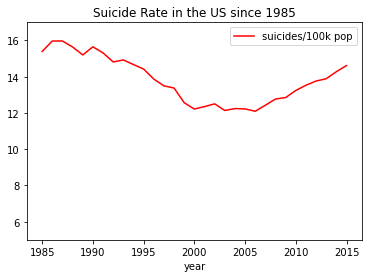

In [23]:
df.query('country=="United States"').plot(x='year', y='suicides/100k pop', ylim=(5, 17), 
                                          title="Suicide Rate in the US since 1985", color='red')

<AxesSubplot:title={'center':'Suicide Rate in the UK since 1985'}, xlabel='year'>

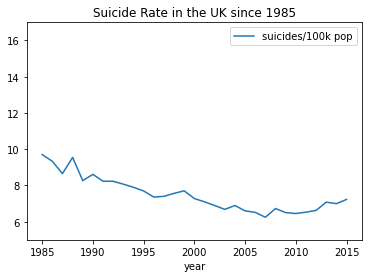

In [24]:
df.query('country=="United Kingdom"').plot(x='year', y='suicides/100k pop', ylim=(5, 17),
                                           title="Suicide Rate in the UK since 1985")

<AxesSubplot:title={'center':'Suicide Rate in Ireland since 1985'}, xlabel='year'>

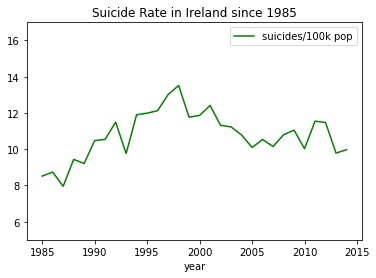

In [50]:
df.query('country=="Ireland"').plot(x='year', y='suicides/100k pop', ylim=(5, 17), 
                                    title="Suicide Rate in Ireland since 1985", color='Green')

<AxesSubplot:title={'center':'Suicide Rate in the Uruguay since 1985'}, xlabel='year'>

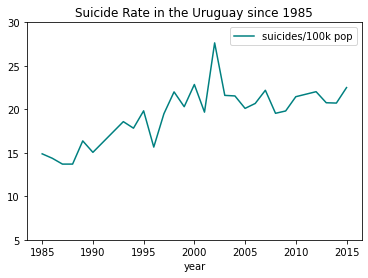

In [51]:
df.query('country=="Uruguay"').plot(x='year', y='suicides/100k pop', ylim=(5, 30), 
                                    title="Suicide Rate in the Uruguay since 1985", color='teal')

<AxesSubplot:title={'center':'Global Suicide Rate since 1985'}, xlabel='year'>

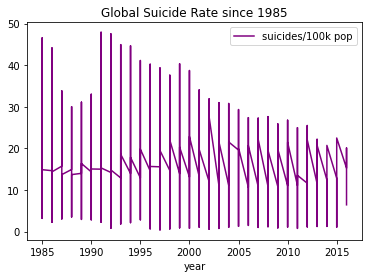

In [27]:
df.plot(x='year', y='suicides/100k pop', title="Global Suicide Rate since 1985", color='purple')
# Not what I wanted

<AxesSubplot:title={'center':'Global Suicides per Year'}, xlabel='year'>

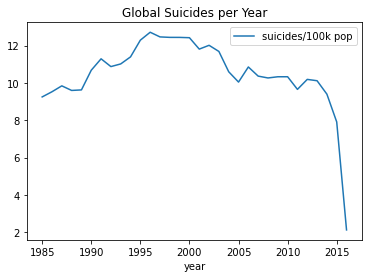

In [28]:
# Making a dataset based on global suicides per year

dfall = df.groupby(['year'], as_index=False).sum()

dfall['suicides/100k pop'] = dfall["suicides/100k pop"].div(df['country'].nunique())
dfall['gdp_per_capita ($)'] = dfall["gdp_per_capita ($)"].div(df['country'].nunique())

dfall.plot(x='year', y='suicides/100k pop', title='Global Suicides per Year')

In [29]:
df['suicides/100k pop']

1       13.617500
2       32.067500
3       27.670000
4        4.931667
5       13.871667
          ...    
1219     8.275000
1220    10.615833
1221     9.694167
1222    11.570000
1223     6.443333
Name: suicides/100k pop, Length: 1193, dtype: float64

##### Global Crises Rate
Time to explore global crises.

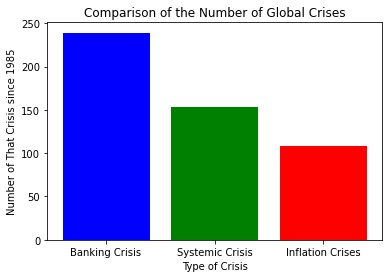

In [30]:
data = {'Banking Crisis':df['Banking Crisis'].sum(), 'Systemic Crisis':df['Systemic Crisis'].sum(), 
        'Inflation Crises':df['Inflation Crises'].sum()}

x = list(data.keys())

y = list(data.values())

plt.bar(x, y, color={'red', 'blue', 'green'})
plt.xlabel("Type of Crisis")
plt.ylabel("Number of That Crisis since 1985")
plt.title("Comparison of the Number of Global Crises")
plt.show()

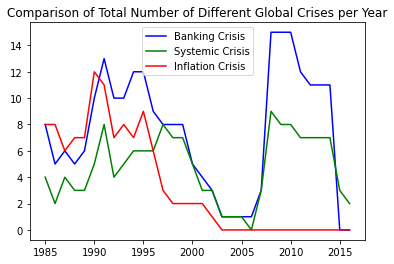

In [49]:
# Types of Global Crises Compare over the Years
plt.plot(dfall['year'],dfall['Banking Crisis'], 'blue', label='Banking Crisis')
plt.plot(dfall['year'],dfall['Systemic Crisis'], 'green', label='Systemic Crisis')
plt.plot(dfall['year'],dfall['Inflation Crises'], 'red', label='Inflation Crisis')
plt.title('Comparison of Total Number of Different Global Crises per Year')
plt.legend()
plt.show()

### Predictive Models

We've decided that Naive Bayes and and SVM would work well with our dataset, after trying a few these were the most ac

### Naive Bayes Model 

In [ ]:
# Importing the dataset
X = df[['Banking Crisis', 'Systemic Crisis', 'meanexch','meanHDI', 'meanGDP' ,'Gold Standard','Domestic_Debt_In_Default','Currency Crises','Inflation Crises','Independence','Inflation, Annual percentages of average consumer prices']]
y = df['Over_Avg_Suicide_R']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
print (ac)

### SVM Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df[['Banking Crisis', 'Systemic Crisis', 'meanexch','meanHDI', 'meanGDP' ,'Gold Standard','Domestic_Debt_In_Default','Currency Crises','Inflation Crises','Independence','Inflation, Annual percentages of average consumer prices']]
y = df['Over_Avg_Suicide_R']

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=109) # 70% training and 30% test

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print(metrics.accuracy_score(y_test, y_pred))